Author: Nik Alleyne <br>
Author Blog: https://www.securitynik.com <br>
Author GitHub:github.com/securitynik <br>
Author Books: [  <br>
                "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/",  <br>
                "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/" <br>
            ] <br>


In [ ]:
## 18. Beginning Deep Learning, - Classification - regression - MIMO - Functional API Tensorflow

Author: Nik Alleyne <br>
Author Blog: https://www.securitynik.com <br>
Author GitHub:github.com/securitynik <br>
Author Books: [  <br>
                "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/",  <br>
                "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/" <br>
            ] <br>


In [1]:
# import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# In the notebooks on Pandas, Matplotlib and Scaling
# we loaded our dataset such as
#   04 - Beginning Pandas <br>
df_conn = pd.read_csv(r'df_conn_with_labels.csv', index_col=0)
df_conn

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
1,48798,0.000000,0,0,0,0,0,0,0
2,48804,0.000000,0,0,0,0,0,0,0
4,27761,0.000000,0,0,0,0,0,0,0
5,8888,0.053276,208,976,6,528,6,1296,0
6,8888,0.383646,227,692369,202,10739,117,240893,0
...,...,...,...,...,...,...,...,...,...
4430183,9200,0.000051,0,0,1,52,1,40,0
4430184,9200,0.000023,0,0,0,0,1,40,0
4430185,9200,0.000005,0,0,0,0,1,40,0
4430186,9200,0.000005,0,0,0,0,1,40,0


This file represents Zeek (formerly Bro) connection log - conn.log`. 
Zeek is a framework used for Network Security Monitoring. 
This entire series is based on using Zeek's data. 
The majority of the notebooks use the conn.log
You can learn more about Zeek here:
   
    https://zeek.org/

Alternatively, come hang out with us in the:
SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals

        https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/ OR

SEC503 SEC503: Network Monitoring and Threat Detection In-Depth

        https://www.sans.org/cyber-security-courses/network-monitoring-threat-detection/


Here are also some blog posts on using Zeek for security monitoring
Installing Zeek: 

        https://www.securitynik.com/2020/06/installing-zeek-314-on-ubuntu-2004.html

Detecting PowerShell Empire Usage: 

        https://www.securitynik.com/2022/02/powershell-empire-detection-with-zeek.html

Detecting Log4J Vulnerability Exploitation: 

        https://www.securitynik.com/2021/12/continuing-log4shell-zeek-detection.html


In [5]:
# Drop the port column
df_conn = df_conn.drop(columns=['id.resp_p'], inplace=False)
df_conn

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
1,0.000000,0,0,0,0,0,0,0
2,0.000000,0,0,0,0,0,0,0
4,0.000000,0,0,0,0,0,0,0
5,0.053276,208,976,6,528,6,1296,0
6,0.383646,227,692369,202,10739,117,240893,0
...,...,...,...,...,...,...,...,...
4430183,0.000051,0,0,1,52,1,40,0
4430184,0.000023,0,0,0,0,1,40,0
4430185,0.000005,0,0,0,0,1,40,0
4430186,0.000005,0,0,0,0,1,40,0


In [6]:
# Looking at above, we see a number of records with 0s. 
# These will add no value to our learning process
# Let's find all those records and drop them
# Reference: https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
df_conn = df_conn.drop(df_conn[(df_conn.duration == 0 ) & (df_conn.orig_bytes == 0 ) \
                               & (df_conn.resp_bytes == 0 ) & (df_conn.orig_pkts == 0 )  \
                                & (df_conn.orig_ip_bytes == 0 ) & (df_conn.resp_pkts == 0 ) \
                                    & (df_conn.resp_ip_bytes == 0 )].index)
df_conn

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
5,0.053276,208,976,6,528,6,1296,0
6,0.383646,227,692369,202,10739,117,240893,0
7,0.054294,208,977,6,528,6,1297,0
8,0.424980,227,791633,176,9387,174,367737,0
9,0.272567,227,406607,171,9127,71,169939,0
...,...,...,...,...,...,...,...,...
4430183,0.000051,0,0,1,52,1,40,0
4430184,0.000023,0,0,0,0,1,40,0
4430185,0.000005,0,0,0,0,1,40,0
4430186,0.000005,0,0,0,0,1,40,0


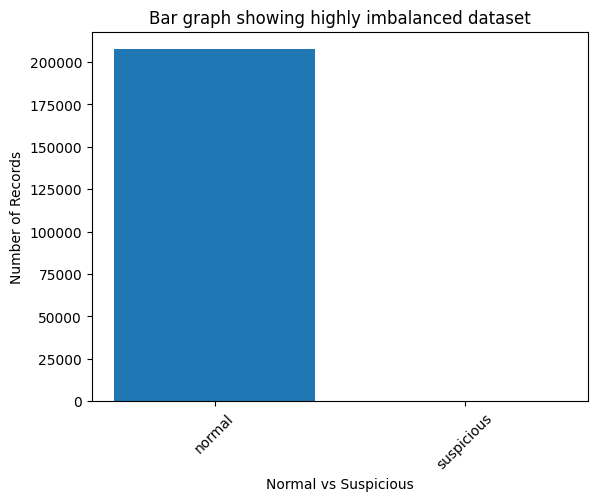

In [7]:
# The graph below shows this dataset is highly imbalanced.
# As a result, using measures like accuracy is more than likely not the best 
# approach, to understand how well our eventual model has "learned"
# via the training data
plt.title('Bar graph showing highly imbalanced dataset')
plt.bar(x=['normal', 'suspicious'], height=[ df_conn[df_conn.label == 0].shape[0], \
                                            df_conn[df_conn.label == 1].shape[0] ])
plt.ylabel(ylabel='Number of Records')
plt.xlabel(xlabel='Normal vs Suspicious')
plt.xticks(rotation=45)
plt.show()


In [8]:
# Getting the percentage of samples that are considered suspicious in this dataset
# This is going to be quite a challenge for this learning algorithm
(df_conn[df_conn.label == 1].shape[0] / df_conn.shape[0]) * 100

0.032272359446649454

In [9]:
# Extract the X_data to be used for the classification part of the model
X_clf = df_conn.drop(columns=['label'], inplace=False)
X_clf

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
5,0.053276,208,976,6,528,6,1296
6,0.383646,227,692369,202,10739,117,240893
7,0.054294,208,977,6,528,6,1297
8,0.424980,227,791633,176,9387,174,367737
9,0.272567,227,406607,171,9127,71,169939
...,...,...,...,...,...,...,...
4430183,0.000051,0,0,1,52,1,40
4430184,0.000023,0,0,0,0,1,40
4430185,0.000005,0,0,0,0,1,40
4430186,0.000005,0,0,0,0,1,40


In [10]:
# Extract the labels to be used for classification
y_label = df_conn.label
y_label

5          0
6          0
7          0
8          0
9          0
          ..
4430183    0
4430184    0
4430185    0
4430186    0
4430187    0
Name: label, Length: 207608, dtype: int64

In [11]:
# In the linear regression notebook, we attempted to predict the resp_ip_bytes
#   11. Beginning Linear Regression - Machine Learning
#   14. Beginning Deep Learning, - Linear Regression, Tensorflow
#   15. Beginning Deep Learning, - Linear Regression, PyTorch  

# Doing something different this time.
# Let's use the orig_bytes to predict the resp_bytes 
# We will then use the combination of regression results and the classification results 
# to conclude if something is suspicious
# Also I choose these two because there is somewhat of a linear relationship between the two
X_reg = df_conn[['orig_bytes', 'resp_bytes']]
X_reg


,orig_bytes,resp_bytes
5,208,976
6,227,692369
7,208,977
8,227,791633
9,227,406607
...,...,...
4430183,0,0
4430184,0,0
4430185,0,0
4430186,0,0


In [12]:
# Is there a relationship between these two variables?
# Below suggest no
X_reg.corr(method='pearson')

,orig_bytes,resp_bytes
orig_bytes,1.000000,0.139104
resp_bytes,0.139104,1.000000


Text(0, 0.5, 'Responder Bytes')

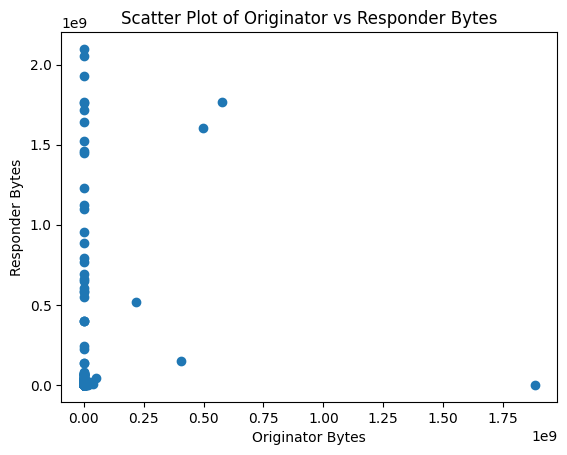

In [13]:
# Do we have a linear relationship here? A better view
plt.title('Scatter Plot of Originator vs Responder Bytes')
plt.scatter(x=X_reg.orig_bytes, y=X_reg.resp_bytes)
plt.xlabel('Originator Bytes')
plt.ylabel('Responder Bytes')

In [14]:
# prepare to split the datasets into training and testing sets
from sklearn.model_selection import train_test_split

In [15]:
# Split the classification data into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf.values, y_label, test_size=0.2, \
                                                                    train_size=0.8, stratify=y_label, random_state=10)
X_train_clf.shape, y_train_clf.shape, X_test_clf.shape, y_test_clf.shape

((166086, 7), (166086,), (41522, 7), (41522,))

In [16]:
# Split the regression data also into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg.orig_bytes.values.reshape(-1,1),  \
                                                                    X_reg.resp_bytes.values, train_size=0.8, random_state=10)
X_train_reg.shape, y_train_reg.shape, X_test_reg.shape, y_test_reg.shape

((166086, 1), (166086,), (41522, 1), (41522,))

In [17]:
# Scaling the data first
# We learned more about scaling in
#   06 - Beginning Data Scaling
# import the scaler library
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler

In [18]:
# Setup the scaler for classification
min_max_clf = MinMaxScaler(feature_range=(0,1))

# Fit on the classification training data
min_max_clf.fit(X_train_clf)

# Transform the train data
X_train_clf = min_max_clf.transform(X_train_clf)
X_train_clf, X_train_clf.shape

(array([[2.63072563e-07, 9.18795041e-08, 7.10178687e-08, ...,
         3.59579942e-07, 1.75013957e-06, 3.05765612e-07],
        [3.61672231e-07, 5.89415687e-08, 2.38314996e-08, ...,
         2.75234030e-07, 1.75013957e-06, 1.34744168e-07],
        [2.79225614e-09, 0.00000000e+00, 0.00000000e+00, ...,
         2.30841444e-07, 1.75013957e-06, 6.90995734e-08],
        ...,
        [1.68135854e-09, 0.00000000e+00, 0.00000000e+00, ...,
         2.30841444e-07, 1.75013957e-06, 6.90995734e-08],
        [1.65133428e-09, 0.00000000e+00, 0.00000000e+00, ...,
         2.30841444e-07, 1.75013957e-06, 6.90995734e-08],
        [3.49932746e-07, 7.80108997e-08, 8.38868784e-08, ...,
         3.24065874e-07, 1.75013957e-06, 3.52407824e-07]]),
 (166086, 7))

In [19]:
# Scale/transform the classification test data 
X_test_clf = min_max_clf.transform(X_test_clf)
X_test_clf

array([[1.73484676e-05, 3.90054499e-07, 8.33234064e-04, ...,
        7.60578166e-05, 6.94805411e-04, 1.16707452e-03],
       [5.08070521e-07, 6.41422953e-08, 5.29059290e-08, ...,
        2.88551805e-07, 1.75013957e-06, 2.40121018e-07],
       [4.43809598e-06, 2.05948775e-06, 1.84884774e-05, ...,
        9.69534066e-06, 5.60044664e-05, 6.65187043e-05],
       ...,
       [5.47522398e-07, 6.41422953e-08, 8.96064383e-08, ...,
        2.88551805e-07, 1.75013957e-06, 3.73137696e-07],
       [1.83147984e-09, 0.00000000e+00, 0.00000000e+00, ...,
        2.30841444e-07, 1.75013957e-06, 6.90995734e-08],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.95094010e-07, 0.00000000e+00, 0.00000000e+00]])

In [20]:
# import PCA to leverage dimensionality reduction
from sklearn.decomposition import PCA

In [21]:
# Setup PCA to use 3 principal Components
# We learned about PCA in
#   07 - Beginning Principal Component Analysis (PCA)
pca = PCA(n_components=3, random_state=10)
pca

PCA(n_components=3, random_state=10)

In [22]:
# Fit the PCA on the X_train classification data
pca.fit(X_train_clf)

# transform the training classification data 
X_train_clf = pca.transform(X_train_clf)
X_train_clf

array([[-0.00025828, -0.00023497, -0.00047665],
       [-0.00025839, -0.00023502, -0.00047653],
       [-0.00025846, -0.00023515, -0.00047686],
       ...,
       [-0.00025846, -0.00023515, -0.00047686],
       [-0.00025846, -0.00023515, -0.00047686],
       [-0.00025826, -0.00023494, -0.00047657]])

In [23]:
# Use the opportunity to PCA transform the X_test classification data
X_test_clf = pca.transform(X_test_clf)
X_test_clf

array([[ 0.00134937,  0.000691  , -0.0008094 ],
       [-0.00025832, -0.00023494, -0.0004764 ],
       [-0.00018612, -0.00015918, -0.0004979 ],
       ...,
       [-0.00025824, -0.00023488, -0.00047639],
       [-0.00025846, -0.00023515, -0.00047686],
       [-0.00025896, -0.0002359 , -0.00047662]])

In [24]:
# Scale the regression data
# Need to setup a new scaler
# While the regression data is a subset of the original data, 
# we need to keep in mind that scaler was trained on  7 features. 
# Hence we cannot transform this data but instead need to setup a new scaler for this one feature
# The new X data has 1 feature

min_max_reg = MinMaxScaler(feature_range=(0,1))
min_max_reg.fit(X_train_reg)

X_train_reg = min_max_reg.transform(X_train_reg)
X_train_reg

array([[1.05184152e-07],
       [0.00000000e+00],
       [0.00000000e+00],
       ...,
       [8.80253231e-07],
       [0.00000000e+00],
       [1.05184152e-07]])

In [25]:
#  Transform the training data
X_test_reg = min_max_reg.transform(X_test_reg)
X_test_reg

array([[1.54057596e-08],
       [0.00000000e+00],
       [0.00000000e+00],
       ...,
       [0.00000000e+00],
       [0.00000000e+00],
       [1.05184152e-07]])

In [26]:
# Let's use the opportunity to scale the target variable also
# We don't need to but doing something different
y_train_reg = min_max_reg.transform(y_train_reg.reshape(-1,1))
y_test__reg = min_max_reg.transform(y_test_reg.reshape(-1,1))
y_train_reg[:5], y_test_reg[:5]

(array([[5.18483496e-07],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]]),
 array([164,   0,   0, 545,   0], dtype=int64))

In [27]:
# In this notebook, I'm using  the  Functional API as in the other notebooks, I used subclassing and sequential class.
#   12. Beginning Deep Learning - Anomaly Detection with AutoEncoders, Tensorflow
#   13. Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch
#   14. Beginning Deep Learning, - Linear Regression, Tensorflow
#   15. Beginning Deep Learning, - Linear Regression, PyTorch
#   16. Beginning Deep Learning, - Classification, Tensorflow
#   17. Beginning Deep Learning, - Classification, Pytorch
# https://www.tensorflow.org/guide/keras/functional

In [28]:
# Import tensorflow
import tensorflow as tf

In [29]:
# Setup the classification input layer
clf_input = tf.keras.layers.Input(shape=(X_train_clf.shape[1],), name='classification_input', dtype=tf.float32)
clf_input


<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'classification_input')>

In [30]:
# Setup the regression input
reg_input = tf.keras.layers.Input(shape=(1,), name='regression_input', dtype=tf.float32)
reg_input

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'regression_input')>

In [38]:
# Get insights into the inputs shape and datatypes
reg_input.shape, reg_input.dtype, clf_input.shape, clf_input.dtype

(TensorShape([None, 1]), tf.float32, TensorShape([None, 3]), tf.float32)

In [39]:
# Setup the Dense layers and dropout (Regularization) layer for regression
# Dropout is covered in notebook
#   21 - Beginning Regularization - Early Stopping, Dropout, L2 (Ridge), L1 (Lasso) <br>
reg_x = tf.keras.layers.Dense(units=8, activation='relu', name='reg_hidden_1')(reg_input)
reg_x = tf.keras.layers.Dropout(rate=0.25, name='reg_dropout_1')(reg_x)
reg_x = tf.keras.layers.Dense(units=8, activation='relu', name='reg_hidden_2')(reg_x)
reg_x


<KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'reg_hidden_2')>

In [40]:
# Setup the classification Dense and Dropout (regularization) layers 
clf_x = tf.keras.layers.Dense(units=4, activation='relu', name='clf_hidden_1')(clf_input)
clf_x = tf.keras.layers.Dropout(rate=0.25, name='clf_dropout_1')(clf_x)
clf_x = tf.keras.layers.Dense(units=4, activation='relu', name='clf_hidden_2')(clf_x)
clf_x = tf.keras.layers.Dropout(rate=0.25, name='clf_dropout_2')(clf_x)
clf_x = tf.keras.layers.Dense(units=4, activation='relu', name='clf_hidden_3')(clf_x)
clf_x

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'clf_hidden_3')>

In [41]:
# Setup a shared layer
# This layer is used for both classification and regression
reg_clf_x = tf.keras.layers.concatenate([reg_x, clf_x], name='concatenated_shared_layer')
reg_clf_dropout = tf.keras.layers.Dropout(rate=0.25, name='reg_clf_dropout_3')(reg_clf_x)

In [42]:
# Setup the output layers
# Each output will have its input as the shared layer
reg_output = tf.keras.layers.Dense(units=1, activation='linear', name='reg_output')(reg_clf_dropout)
clf_output = tf.keras.layers.Dense(units=1, activation='sigmoid', name='clf_output')(reg_clf_dropout)
reg_output, clf_output

(<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'reg_output')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'clf_output')>)

In [43]:
# compile the model
reg_clf_model = tf.keras.Model(inputs=[reg_input, clf_input], outputs=[reg_output, clf_output], \
                               name='regression_classification_model')

# Get the model summary
reg_clf_model.summary()

Model: "regression_classification_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 classification_input (InputLay  [(None, 3)]         0           []                               
 er)                                                                                              
                                                                                                  
 clf_hidden_1 (Dense)           (None, 4)            16          ['classification_input[0][0]']   
                                                                                                  
 regression_input (InputLayer)  [(None, 1)]          0           []                               
                                                                                                  
 clf_dropout_1 (Dropout)        (None, 4)            0           ['c

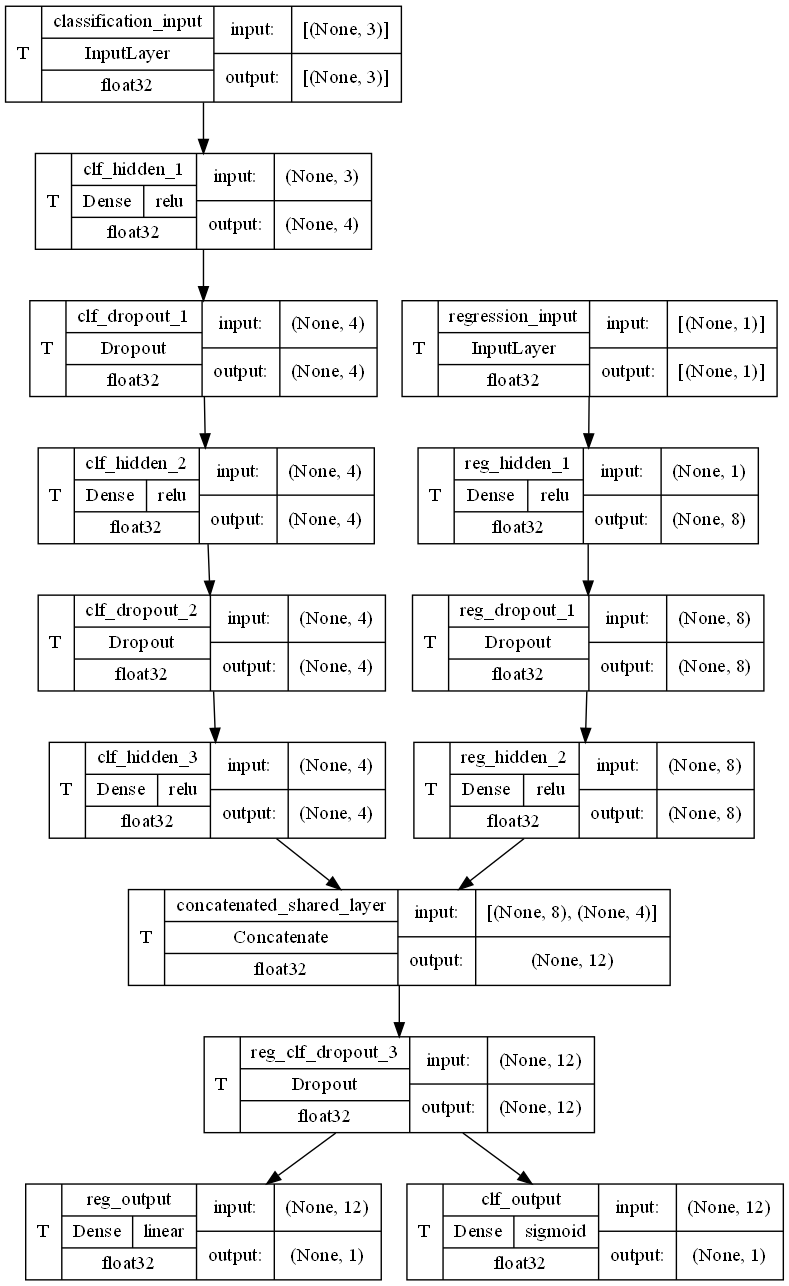

In [44]:
# Plot the model to see the model architecture
# Save the model to disk also
tf.keras.utils.plot_model(model=reg_clf_model, to_file='./reg_clf_model.png', dpi=100, show_dtype=True, \
                          show_layer_activations=True, show_layer_names=True, show_shapes=True, show_trainable=True)

In [45]:
# compile the model
# Give the classification loss greater priority than the regression loss
reg_clf_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), \
                      loss={'reg_output' : tf.keras.losses.MeanAbsoluteError(), \
                            'clf_output': tf.keras.losses.BinaryCrossentropy()}, \
                                metrics={'reg_output': tf.keras.metrics.mae, 'clf_output' : tf.keras.metrics.Recall() }, \
                                    loss_weights={'reg_output' : 1, 'clf_output': 3} )

In [46]:
# Define the callbacks
# Also save the model as we go. This is helpful if training on a very large dataset
# Also reduce the learning rate when metric has stopped improving
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau
# Early stopping callback is covered in:
#   21 - Beginning Regularization - Early Stopping, Dropout, L2 (Ridge), L1 (Lasso) <br>
callbacks = [ 
                tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min', \
                                                 restore_best_weights=True, verbose=1), 
                tf.keras.callbacks.ModelCheckpoint(filepath=r'.', monitor='val_loss', verbose=1, \
                                                   save_best_only=True, save_weights_only=False, \
                                                    save_freq='epoch', mode='min'),
                tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, mode='min', min_lr=0., \
                                                     min_delta=0.001, verbose=1)
              ]

In [48]:
# Train the model for 10 epochs
# Not that 10 epochs is correct, just in the interest of time, I choose 10
reg_clf_model.fit({'regression_input':X_train_reg, 'classification_input':X_train_clf}, \
                  {'reg_output':y_train_reg, 'clf_output': y_train_clf}, epochs=10, validation_split=0.2, \
                    batch_size=32, callbacks=callbacks)

Epoch 1/10
4153/4153 [==============================] - ETA: 0s - loss: 0.0098 - reg_output_loss: 6.4178e-04 - clf_output_loss: 0.0030 - reg_output_mean_absolute_error: 6.4178e-04 - clf_output_recall: 0.0000e+00
Epoch 1: val_loss did not improve from 0.01002
4153/4153 [==============================] - 15s 4ms/step - loss: 0.0098 - reg_output_loss: 6.4178e-04 - clf_output_loss: 0.0030 - reg_output_mean_absolute_error: 6.4178e-04 - clf_output_recall: 0.0000e+00 - val_loss: 0.0101 - val_reg_output_loss: 9.5998e-04 - val_clf_output_loss: 0.0031 - val_reg_output_mean_absolute_error: 9.5998e-04 - val_clf_output_recall: 0.0000e+00 - lr: 0.0010
Epoch 2/10
4145/4153 [============================>.] - ETA: 0s - loss: 0.0094 - reg_output_loss: 6.0129e-04 - clf_output_loss: 0.0029 - reg_output_mean_absolute_error: 6.0129e-04 - clf_output_recall: 0.0000e+00
Epoch 2: val_loss improved from 0.01002 to 0.00941, saving model to .


INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


4153/4153 [==============================] - 18s 4ms/step - loss: 0.0094 - reg_output_loss: 6.0101e-04 - clf_output_loss: 0.0029 - reg_output_mean_absolute_error: 6.0101e-04 - clf_output_recall: 0.0000e+00 - val_loss: 0.0094 - val_reg_output_loss: 4.7632e-04 - val_clf_output_loss: 0.0030 - val_reg_output_mean_absolute_error: 4.7632e-04 - val_clf_output_recall: 0.0000e+00 - lr: 0.0010
Epoch 3/10
4132/4153 [============================>.] - ETA: 0s - loss: 0.0088 - reg_output_loss: 6.1158e-04 - clf_output_loss: 0.0027 - reg_output_mean_absolute_error: 6.1158e-04 - clf_output_recall: 0.0000e+00
Epoch 3: val_loss improved from 0.00941 to 0.00794, saving model to .


INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


4153/4153 [==============================] - 18s 4ms/step - loss: 0.0089 - reg_output_loss: 6.1042e-04 - clf_output_loss: 0.0028 - reg_output_mean_absolute_error: 6.1042e-04 - clf_output_recall: 0.0000e+00 - val_loss: 0.0079 - val_reg_output_loss: 2.0217e-04 - val_clf_output_loss: 0.0026 - val_reg_output_mean_absolute_error: 2.0217e-04 - val_clf_output_recall: 0.0000e+00 - lr: 0.0010
Epoch 4/10
4139/4153 [============================>.] - ETA: 0s - loss: 0.0092 - reg_output_loss: 6.0404e-04 - clf_output_loss: 0.0029 - reg_output_mean_absolute_error: 6.0404e-04 - clf_output_recall: 0.0000e+00
Epoch 4: val_loss did not improve from 0.00794
4153/4153 [==============================] - 15s 4ms/step - loss: 0.0092 - reg_output_loss: 6.0387e-04 - clf_output_loss: 0.0029 - reg_output_mean_absolute_error: 6.0387e-04 - clf_output_recall: 0.0000e+00 - val_loss: 0.0085 - val_reg_output_loss: 5.7561e-04 - val_clf_output_loss: 0.0027 - val_reg_output_mean_absolute_error: 5.7561e-04 - val_clf_output

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


4153/4153 [==============================] - 18s 4ms/step - loss: 0.0081 - reg_output_loss: 5.4939e-04 - clf_output_loss: 0.0025 - reg_output_mean_absolute_error: 5.4939e-04 - clf_output_recall: 0.0000e+00 - val_loss: 0.0074 - val_reg_output_loss: 2.2404e-04 - val_clf_output_loss: 0.0024 - val_reg_output_mean_absolute_error: 2.2404e-04 - val_clf_output_recall: 0.0000e+00 - lr: 0.0010
Epoch 7/10
4126/4153 [============================>.] - ETA: 0s - loss: 0.0084 - reg_output_loss: 5.4372e-04 - clf_output_loss: 0.0026 - reg_output_mean_absolute_error: 5.4372e-04 - clf_output_recall: 0.0000e+00
Epoch 7: val_loss improved from 0.00741 to 0.00733, saving model to .


INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


4153/4153 [==============================] - 11s 3ms/step - loss: 0.0084 - reg_output_loss: 5.4212e-04 - clf_output_loss: 0.0026 - reg_output_mean_absolute_error: 5.4212e-04 - clf_output_recall: 0.0000e+00 - val_loss: 0.0073 - val_reg_output_loss: 3.0168e-04 - val_clf_output_loss: 0.0023 - val_reg_output_mean_absolute_error: 3.0168e-04 - val_clf_output_recall: 0.0000e+00 - lr: 0.0010
Epoch 8/10
4150/4153 [============================>.] - ETA: 0s - loss: 0.0079 - reg_output_loss: 5.2784e-04 - clf_output_loss: 0.0025 - reg_output_mean_absolute_error: 5.2784e-04 - clf_output_recall: 0.0000e+00
Epoch 8: val_loss did not improve from 0.00733
4153/4153 [==============================] - 9s 2ms/step - loss: 0.0079 - reg_output_loss: 5.2774e-04 - clf_output_loss: 0.0025 - reg_output_mean_absolute_error: 5.2774e-04 - clf_output_recall: 0.0000e+00 - val_loss: 0.0074 - val_reg_output_loss: 3.7550e-04 - val_clf_output_loss: 0.0024 - val_reg_output_mean_absolute_error: 3.7550e-04 - val_clf_output_

In [49]:
# Get the model history
reg_clf_model.history.history

{'loss': [0.009788491763174534,
  0.009355089627206326,
  0.00889610219746828,
  0.009194616228342056,
  0.008601615205407143,
  0.008078427985310555,
  0.00837894156575203,
  0.007879696786403656,
  0.007899328134953976,
  0.008073699660599232],
 'reg_output_loss': [0.0006417759577743709,
  0.0006010113283991814,
  0.0006104244966991246,
  0.0006038746796548367,
  0.0005786663386970758,
  0.0005493853823281825,
  0.0005421151290647686,
  0.000527740572579205,
  0.0005357328918762505,
  0.0005231272662058473],
 'clf_output_loss': [0.0030489040073007345,
  0.0029180205892771482,
  0.002761896001175046,
  0.0028635882772505283,
  0.0026743137277662754,
  0.0025096910540014505,
  0.002612268552184105,
  0.0024506463669240475,
  0.002454532543197274,
  0.0025168622378259897],
 'reg_output_mean_absolute_error': [0.0006417759577743709,
  0.0006010113283991814,
  0.0006104244966991246,
  0.0006038746796548367,
  0.0005786663386970758,
  0.0005493853823281825,
  0.0005421151290647686,
  0.0005

In [50]:
# Get the various keys in the history
reg_clf_model.history.history.keys()

dict_keys(['loss', 'reg_output_loss', 'clf_output_loss', 'reg_output_mean_absolute_error', 'clf_output_recall', 'val_loss', 'val_reg_output_loss', 'val_clf_output_loss', 'val_reg_output_mean_absolute_error', 'val_clf_output_recall', 'lr'])

In [51]:
# How did our algorithm perform
print(reg_clf_model.history.history)

{'loss': [0.009788491763174534, 0.009355089627206326, 0.00889610219746828, 0.009194616228342056, 0.008601615205407143, 0.008078427985310555, 0.00837894156575203, 0.007879696786403656, 0.007899328134953976, 0.008073699660599232], 'reg_output_loss': [0.0006417759577743709, 0.0006010113283991814, 0.0006104244966991246, 0.0006038746796548367, 0.0005786663386970758, 0.0005493853823281825, 0.0005421151290647686, 0.000527740572579205, 0.0005357328918762505, 0.0005231272662058473], 'clf_output_loss': [0.0030489040073007345, 0.0029180205892771482, 0.002761896001175046, 0.0028635882772505283, 0.0026743137277662754, 0.0025096910540014505, 0.002612268552184105, 0.0024506463669240475, 0.002454532543197274, 0.0025168622378259897], 'reg_output_mean_absolute_error': [0.0006417759577743709, 0.0006010113283991814, 0.0006104244966991246, 0.0006038746796548367, 0.0005786663386970758, 0.0005493853823281825, 0.0005421151290647686, 0.000527740572579205, 0.0005357328918762505, 0.0005231272662058473], 'clf_out

In [52]:
# Get the loss as a dataframe
pd.DataFrame(reg_clf_model.history.history)

,loss,reg_output_loss,clf_output_loss,reg_output_mean_absolute_error,clf_output_recall,val_loss,val_reg_output_loss,val_clf_output_loss,val_reg_output_mean_absolute_error,val_clf_output_recall,lr
0,0.009788,0.000642,0.003049,0.000642,0.0,0.010119,0.000960,0.003053,0.000960,0.0,0.001
1,0.009355,0.000601,0.002918,0.000601,0.0,0.009411,0.000476,0.002978,0.000476,0.0,0.001
2,0.008896,0.000610,0.002762,0.000610,0.0,0.007936,0.000202,0.002578,0.000202,0.0,0.001
3,0.009195,0.000604,0.002864,0.000604,0.0,0.008535,0.000576,0.002653,0.000576,0.0,0.001
4,0.008602,0.000579,0.002674,0.000579,0.0,0.007949,0.000658,0.002430,0.000658,0.0,0.001
5,0.008078,0.000549,0.002510,0.000549,0.0,0.007414,0.000224,0.002397,0.000224,0.0,0.001
6,0.008379,0.000542,0.002612,0.000542,0.0,0.007326,0.000302,0.002341,0.000302,0.0,0.001
7,0.007880,0.000528,0.002451,0.000528,0.0,0.007437,0.000375,0.002354,0.000375,0.0,0.001
8,0.007899,0.000536,0.002455,0.000536,0.0,0.008062,0.000755,0.002436,0.000755,0.0,0.001
9,0.008074,0.000523,0.002517,0.000523,0.0,0.008374,0.001009,0.002455,0.001009,0.0,0.001


In [53]:
# A clearer view
# Transpose the dataset looking across the epochs
pd.DataFrame(reg_clf_model.history.history).transpose()

,0,1,2,3,4,5,6,7,8,9
loss,0.009788,0.009355,0.008896,0.009195,0.008602,0.008078,0.008379,0.007880,0.007899,0.008074
reg_output_loss,0.000642,0.000601,0.000610,0.000604,0.000579,0.000549,0.000542,0.000528,0.000536,0.000523
clf_output_loss,0.003049,0.002918,0.002762,0.002864,0.002674,0.002510,0.002612,0.002451,0.002455,0.002517
reg_output_mean_absolute_error,0.000642,0.000601,0.000610,0.000604,0.000579,0.000549,0.000542,0.000528,0.000536,0.000523
clf_output_recall,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
val_loss,0.010119,0.009411,0.007936,0.008535,0.007949,0.007414,0.007326,0.007437,0.008062,0.008374
val_reg_output_loss,0.000960,0.000476,0.000202,0.000576,0.000658,0.000224,0.000302,0.000375,0.000755,0.001009
val_clf_output_loss,0.003053,0.002978,0.002578,0.002653,0.002430,0.002397,0.002341,0.002354,0.002436,0.002455
val_reg_output_mean_absolute_error,0.000960,0.000476,0.000202,0.000576,0.000658,0.000224,0.000302,0.000375,0.000755,0.001009
val_clf_output_recall,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


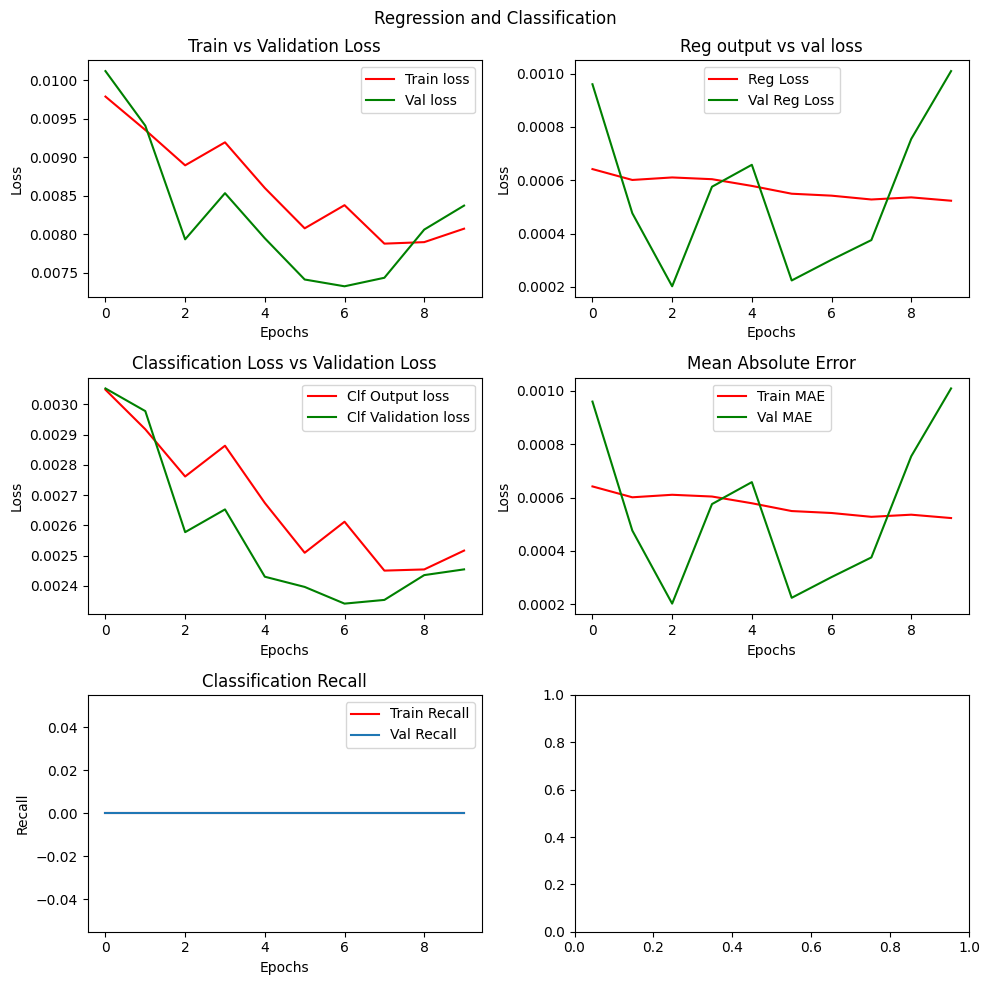

In [54]:
# plot the loss and accuracy
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
# We can see from below the loss has decreased while the accuracy has increased.
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(10,10))
plt.suptitle('Regression and Classification')

ax[0][0].plot(reg_clf_model.history.history['loss'], 'r', reg_clf_model.history.history['val_loss'], 'g' )
ax[0][0].set_title('Train vs Validation Loss')
ax[0][0].legend(labels=['Train loss', 'Val loss'])
ax[0][0].set_xlabel('Epochs')
ax[0][0].set_ylabel('Loss')

ax[0][1].plot(reg_clf_model.history.history['reg_output_loss'], 'r', \
              reg_clf_model.history.history['val_reg_output_loss'], 'g' )
ax[0][1].set_title('Reg output vs val loss')
ax[0][1].legend(labels=['Reg Loss', 'Val Reg Loss'])
ax[0][1].set_xlabel('Epochs')
ax[0][1].set_ylabel('Loss')

ax[1][0].plot(reg_clf_model.history.history['clf_output_loss'], 'r', \
              reg_clf_model.history.history['val_clf_output_loss'], 'g' )
ax[1][0].set_title('Classification Loss vs Validation Loss')
ax[1][0].legend(labels=['Clf Output loss', 'Clf Validation loss'])
ax[1][0].set_xlabel('Epochs')
ax[1][0].set_ylabel('Loss')

ax[1][1].plot(reg_clf_model.history.history['reg_output_mean_absolute_error'], 'r', \
              reg_clf_model.history.history['val_reg_output_mean_absolute_error'], 'g' )
ax[1][1].set_title('Mean Absolute Error')
ax[1][1].legend(labels=['Train MAE', 'Val MAE'])
ax[1][1].set_xlabel('Epochs')
ax[1][1].set_ylabel('Loss')

ax[2][0].plot(reg_clf_model.history.history['clf_output_recall'], 'r', reg_clf_model.history.history['val_clf_output_recall'] )
ax[2][0].set_title('Classification Recall')
ax[2][0].legend(labels=['Train Recall', 'Val Recall'])
ax[2][0].set_xlabel('Epochs')
ax[2][0].set_ylabel('Recall')

plt.tight_layout()

plt.show()

In [55]:
# Evaluate the model
# Notice the input consists of values for both regression and classification
# Notice the x and y are in the same order as when the model was trained
results = reg_clf_model.evaluate(x=[X_test_reg, X_test_clf], y=[y_test_reg, y_test_clf])
results

1298/1298 [==============================] - 2s 1ms/step - loss: 294384.2812 - reg_output_loss: 294384.2812 - clf_output_loss: 0.0021 - reg_output_mean_absolute_error: 294384.2812 - clf_output_recall: 0.0769


[294384.28125,
 294384.28125,
 0.002069746609777212,
 294384.28125,
 0.07692307978868484]

In [56]:
# Review the evaluation metrics from a different perspective
dict(zip(reg_clf_model.metrics_names, results))

{'loss': 294384.28125,
 'reg_output_loss': 294384.28125,
 'clf_output_loss': 0.002069746609777212,
 'reg_output_mean_absolute_error': 294384.28125,
 'clf_output_recall': 0.07692307978868484}

In [57]:
# Define an x for prediction
#new_clf_sample = np.array([0.053276, 208, 976, 6, 528, 6, 1296], ndmin=2)
new_clf_sample = np.array([60, 219876, 77765, 239747, 1251154, 169995, 209977], ndmin=2)
new_clf_sample

array([[     60,  219876,   77765,  239747, 1251154,  169995,  209977]])

In [58]:
# New regression sample
new_reg_sample = np.array([998654], ndmin=2)
new_reg_sample

array([[998654]])

In [59]:
# Predict the number of bytes and the class
reg_pred, clf_pred = reg_clf_model.predict(x=[min_max_reg.transform(new_reg_sample), \
                                              pca.transform(min_max_clf.transform(new_clf_sample))] )

# What does the predictions looks like
reg_pred, clf_pred

1/1 [==============================] - 0s 95ms/step


(array([[0.00133959]], dtype=float32), array([[0.02511245]], dtype=float32))

In [60]:
# Invert the transformation
# Convert the values to integers
# Well we know that we cannot have negative bytes, so this regression aspect of the model needs work
int(min_max_reg.inverse_transform(reg_pred))

2521656

In [61]:
# Did scaling the target contribute to this terrible output
# Maybe, maybe not. I'm not interested in finding out for this problem
# If I was putting this in production, I would have to solve this issue though

In [62]:
# Predict on the test sets for both regression and classification
test_preds = reg_clf_model.predict(x=[X_test_reg,  X_test_clf] )

# These all need to go through the same process of inverting the scaling and 
test_preds[0], test_preds[1] 

1298/1298 [==============================] - 1s 970us/step


(array([[0.00010485],
        [0.000121  ],
        [0.00012004],
        ...,
        [0.000121  ],
        [0.00012101],
        [0.00012102]], dtype=float32),
 array([[0.00017951],
        [0.00013557],
        [0.00013787],
        ...,
        [0.00013558],
        [0.00013556],
        [0.00013554]], dtype=float32))

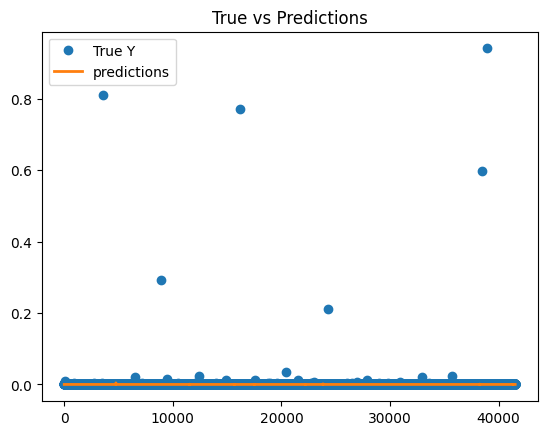

In [63]:
# Above confirms this model is terrible. 
# Take a look at the graph below, gives us a better view of the model
plt.title('True vs Predictions')
plt.plot(y_test__reg, linestyle='', marker='o', label='True Y')
plt.plot(test_preds[0], ls='-', lw=2, label='predictions')
plt.legend(loc='best')


In [64]:
# How did our model do for training
# import some metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [65]:
# Grabbing the accuracy score
# Note, we cannot just get the predictions as this would produce continuous values
# Imagine the model is reporting 99% accuracy. 
# Accuracy is misleading here
accuracy_score(y_true=y_test_clf, y_pred=np.round(test_preds[1]))

0.9997109965801262

In [66]:
# import seaborn
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
import seaborn as sns

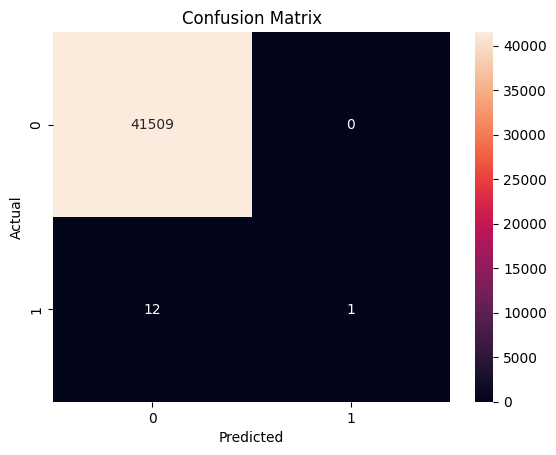

In [67]:
# Looking at the confusion matrix
# To get a better understanding of reading the confusion matrix, see
#   10. Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics
sns.heatmap(confusion_matrix(y_true=y_test_clf, y_pred=np.round(test_preds[1])), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Imagine this model has no true positives. Yet above, it reported 99% accuracy.
# Don't be fooled by accuracy

In [68]:
# Let's save the model
import os

In [69]:
# Create the location to save the model
PATH = './SAVED_MODELS/TF_FUNCTIONAL_MIMO/'
MODELS_PATH = os.makedirs(name=PATH, exist_ok=True)

In [70]:
# Save the model
tf.keras.models.save_model(model=reg_clf_model, filepath=f'{PATH}/tf_mimo_functional_model.tf', \
                           overwrite=True, save_format='tf')

INFO:tensorflow:Assets written to: ./SAVED_MODELS/TF_FUNCTIONAL_MIMO//tf_mimo_functional_model.tf\assets


INFO:tensorflow:Assets written to: ./SAVED_MODELS/TF_FUNCTIONAL_MIMO//tf_mimo_functional_model.tf\assets


In [71]:
# With the model saved, time to load it
loaded_tf_reg_clf_model = tf.keras.models.load_model(filepath=f'{PATH}tf_mimo_functional_model.tf')
loaded_tf_reg_clf_model

In [72]:
# Make a prediction
loaded_tf_reg_clf_model.predict(x=[min_max_reg.transform(new_reg_sample), \
                                              pca.transform(min_max_clf.transform(new_clf_sample))])

1/1 [==============================] - 0s 69ms/step


[array([[0.00133959]], dtype=float32), array([[0.02511245]], dtype=float32)]

In [ ]:
# Moving on!

Additional References and good reads: <br>
https://www.tensorflow.org/guide/keras/train_and_evaluate/#class_weights <br>
https://stackoverflow.com/questions/66845924/multi-input-multi-output-model-with-keras-functional-api <br>
https://pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/ <br>
https://towardsdatascience.com/how-to-build-tensorflow-models-with-the-keras-functional-api-bb6f084def83 <br>
https://goodboychan.github.io/python/coursera/tensorflow/deeplearning.ai/2022/02/05/01-Tensorflow2-Functional-API.html <br>
